In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Joy-laptop\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing csv files into dataframes

daily_activity = pd.read_csv(r"D:\PROJECTS\Google DA Capstone\Fitabase Data 4.12.16-5.12.16\For Project\dailyActivity.csv")
daily_sleep = pd.read_csv(r"D:\PROJECTS\Google DA Capstone\Fitabase Data 4.12.16-5.12.16\For Project\sleepDay.csv")

In [3]:
#Turning column names to lowercase for consistency

daily_activity.columns = daily_activity.columns.str.lower()
daily_sleep.columns = daily_sleep.columns.str.lower()

In [4]:
###Removing unncessary columns

#In daily_activity df 'totalDistance' and 'tranckerdistance' seems to have the same data. Remove 'trackerdistance' column

daily_activity.drop(columns='trackerdistance', inplace= True)


#Drop LoggedActivitiesDistance from daily_activity

daily_activity.drop(columns='loggedactivitiesdistance', inplace = True)


#SedentaryActiveDistance doesn't add any value and is pretty much useless so we will remove it

daily_activity.drop(columns='sedentaryactivedistance', inplace = True)

In [5]:
#Changing 'totaldistance' to 2 decimal places

daily_activity['totaldistance'] = daily_activity['totaldistance'].round(decimals= 2)

In [6]:
#Verifying number of users in datasets

daily_activity['id'].nunique()

33

In [7]:
daily_sleep['id'].nunique()

24

In [8]:
#people who use device daily but not during sleep

daily_activity['id'].nunique() - daily_sleep['id'].nunique()

9

In [9]:
#Checking for duplicates

sum(daily_activity.duplicated())

0

In [10]:
sum(daily_sleep.duplicated())

3

In [11]:
#Removing duplicates

daily_sleep.drop_duplicates(inplace= True)

In [12]:
#check

sum(daily_sleep.duplicated())

0

In [13]:
#changing 'activitydate' & 'sleepday' columns to datetime

daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
daily_sleep['sleepday'] = pd.to_datetime(daily_sleep['sleepday'])

In [14]:
#check

daily_activity.dtypes

id                                   int64
activitydate                datetime64[ns]
totalsteps                           int64
totaldistance                      float64
veryactivedistance                 float64
moderatelyactivedistance           float64
lightactivedistance                float64
veryactiveminutes                    int64
fairlyactiveminutes                  int64
lightlyactiveminutes                 int64
sedentaryminutes                     int64
calories                             int64
dtype: object

In [15]:
#check

daily_sleep.dtypes

id                             int64
sleepday              datetime64[ns]
totalsleeprecords              int64
totalminutesasleep             int64
totaltimeinbed                 int64
dtype: object

In [16]:
""""
Since we will merge the 'daily_activity' & 'daily_sleep' dataframes we want to maintain date format consistency, 
so we will ignore the time part of 'sleepday' column in 'daily_sleep' dataframe
"""

daily_sleep['sleepday'] = pd.to_datetime(daily_sleep['sleepday']).dt.date

In [17]:
daily_sleep.dtypes

id                     int64
sleepday              object
totalsleeprecords      int64
totalminutesasleep     int64
totaltimeinbed         int64
dtype: object

In [18]:
daily_sleep['sleepday'] = pd.to_datetime(daily_sleep['sleepday'])

In [19]:
daily_sleep.rename(columns= {'sleepday':'activitydate'}, inplace= True)

In [20]:
daily_sleep

,id,activitydate,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


In [21]:
#Merging 'daily_activity' and 'daily_sleep' datasets

df_activity_sleep = pd.merge(left = daily_activity, right = daily_sleep, on = ['id', 'activitydate'], how = "inner")

In [22]:
#The Merged DataFrame

df_activity_sleep

,id,activitydate,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,8792009665,2016-04-30,7174,4.59,0.33,0.36,3.91,10,20,301,749,2896,1,343,360
406,8792009665,2016-05-01,1619,1.04,0.00,0.00,1.04,0,0,79,834,1962,1,503,527
407,8792009665,2016-05-02,1831,1.17,0.00,0.00,1.17,0,0,101,916,2015,1,415,423
408,8792009665,2016-05-03,2421,1.55,0.00,0.00,1.55,0,0,156,739,2297,1,516,545


In [23]:
#group by id for df_activity_sleep

groupby_id_activity_sleep = df_activity_sleep.groupby(by='id')

In [24]:
#Can see aggregate data now as per id

groupby_id_activity_sleep[['totalsteps', 'totaldistance', 'calories']].get_group(1503960366).mean()

totalsteps       12405.6800
totaldistance        7.9712
calories          1872.2800
dtype: float64

In [25]:
#The average of each category as per 'id'

avg_data = df_activity_sleep.groupby(by='id').mean()

In [26]:
avg_data

,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
id,,,,,,,,,,,,,
1503960366,12405.680000,7.971200,2.772000,0.847200,4.346000,37.920000,20.280000,233.120000,759.280000,1872.280000,1.080000,360.280000,383.200000
1644430081,7967.750000,5.792500,0.175000,0.862500,4.750000,2.500000,19.500000,241.250000,920.500000,2977.750000,1.000000,294.000000,346.000000
1844505072,3477.000000,2.303333,0.000000,0.086667,2.213333,0.000000,2.333333,145.000000,443.333333,1676.333333,1.000000,652.000000,961.000000
1927972279,1490.000000,1.032000,0.000000,0.000000,1.032000,0.000000,0.000000,85.000000,977.200000,2316.200000,1.600000,417.000000,437.800000
2026352035,5618.678571,3.487143,0.006786,0.012500,3.466429,0.107143,0.285714,256.500000,653.964286,1540.785714,1.000000,506.178571,537.642857
2320127002,5079.000000,3.420000,0.000000,0.000000,3.420000,0.000000,0.000000,242.000000,1129.000000,1804.000000,1.000000,61.000000,69.000000
2347167796,8533.200000,5.681333,0.729333,0.854667,4.098667,9.200000,16.133333,245.866667,628.400000,1971.333333,1.000000,446.800000,491.333333
3977333714,11218.000000,7.676071,1.689643,2.747500,3.226786,19.821429,61.285714,181.535714,716.214286,1560.392857,1.142857,293.642857,461.142857
4020332650,6596.750000,4.731250,0.486250,0.416250,3.770000,15.000000,15.500000,218.500000,841.875000,3195.000000,1.000000,349.375000,379.750000


In [27]:
#resetting the index

avg_data.reset_index(inplace=True)

In [28]:
#changing 'id' to string type for plotting bar chart

avg_data['id']= avg_data['id'].astype('str')

In [29]:
#Check

avg_data.dtypes

id                           object
totalsteps                  float64
totaldistance               float64
veryactivedistance          float64
moderatelyactivedistance    float64
lightactivedistance         float64
veryactiveminutes           float64
fairlyactiveminutes         float64
lightlyactiveminutes        float64
sedentaryminutes            float64
calories                    float64
totalsleeprecords           float64
totalminutesasleep          float64
totaltimeinbed              float64
dtype: object

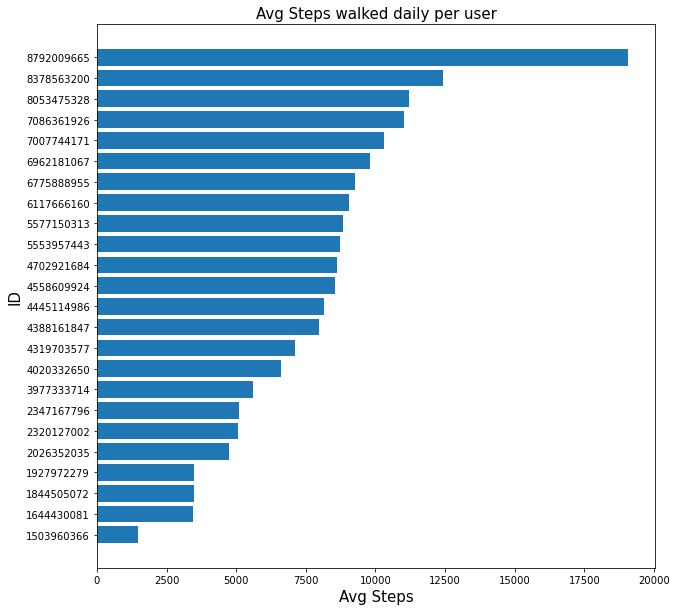

In [30]:
#adjust figure size, label font size, and axis font size

plt.figure(figsize=(10,10))
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Horizontal Barchart and values Sorted by 'totalsteps' in ascending order

plt.barh(avg_data['id'], avg_data['totalsteps'].sort_values(ascending=True))

#labeling

plt.xlabel('Avg Steps')
plt.ylabel('ID')
plt.title('Avg Steps walked daily per user')

plt.show()

In [31]:
#adding a conditional column 'user_type' based on average total steps per user

conditions = [
    (avg_data['totalsteps'] >= 10000),
    (avg_data['totalsteps'] >= 7500) & (avg_data['totalsteps'] < 10000),
    (avg_data['totalsteps'] >= 5000) & (avg_data['totalsteps'] < 7500),
    (avg_data['totalsteps'] < 5000)
]

values = ['very active', 'fairly active', 'lightly active', 'sedentary']

avg_data['user_type'] = np.select(conditions, values)

#round the dataframe values to 2 decimal places

avg_data = avg_data.round(2)

avg_data

,id,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,user_type
0,1503960366,12405.68,7.97,2.77,0.85,4.35,37.92,20.28,233.12,759.28,1872.28,1.08,360.28,383.20,very active
1,1644430081,7967.75,5.79,0.17,0.86,4.75,2.50,19.50,241.25,920.50,2977.75,1.00,294.00,346.00,fairly active
2,1844505072,3477.00,2.30,0.00,0.09,2.21,0.00,2.33,145.00,443.33,1676.33,1.00,652.00,961.00,sedentary
3,1927972279,1490.00,1.03,0.00,0.00,1.03,0.00,0.00,85.00,977.20,2316.20,1.60,417.00,437.80,sedentary
4,2026352035,5618.68,3.49,0.01,0.01,3.47,0.11,0.29,256.50,653.96,1540.79,1.00,506.18,537.64,lightly active
5,2320127002,5079.00,3.42,0.00,0.00,3.42,0.00,0.00,242.00,1129.00,1804.00,1.00,61.00,69.00,lightly active
6,2347167796,8533.20,5.68,0.73,0.85,4.10,9.20,16.13,245.87,628.40,1971.33,1.00,446.80,491.33,fairly active
7,3977333714,11218.00,7.68,1.69,2.75,3.23,19.82,61.29,181.54,716.21,1560.39,1.14,293.64,461.14,very active
8,4020332650,6596.75,4.73,0.49,0.42,3.77,15.00,15.50,218.50,841.88,3195.00,1.00,349.38,379.75,lightly active
9,4319703577,7125.42,4.79,0.19,0.50,4.01,2.62,12.31,244.31,642.69,2024.69,1.04,476.65,501.96,lightly active


In [32]:
df_user_type = avg_data[['id','user_type']]

In [33]:
#number of time each user_type value appears

df_user_type['user_type'].value_counts()

fairly active     9
very active       5
sedentary         5
lightly active    5
Name: user_type, dtype: int64

In [34]:
#proportion of each user_type value to total

df_user_type['user_type'].value_counts(normalize= True)

fairly active     0.375000
very active       0.208333
sedentary         0.208333
lightly active    0.208333
Name: user_type, dtype: float64

In [35]:
#proportion of each user_type value to total in % into a dataframe

user_type_percentage = df_user_type['user_type'].value_counts(normalize= True)*100

user_type_percentage = pd.DataFrame(data= user_type_percentage)


#round to 2 decimal places

user_type_percentage = user_type_percentage.round(2)

user_type_percentage

,user_type
fairly active,37.50
very active,20.83
sedentary,20.83
lightly active,20.83


In [36]:
#reset the index

user_type_percentage.reset_index(inplace= True)

In [37]:
#rename the columns properly

user_type_percentage.rename(columns={'index':'user_type',
                                    'user_type': 'perc_total'}, inplace= True)

In [38]:
user_type_percentage

,user_type,perc_total
0,fairly active,37.50
1,very active,20.83
2,sedentary,20.83
3,lightly active,20.83


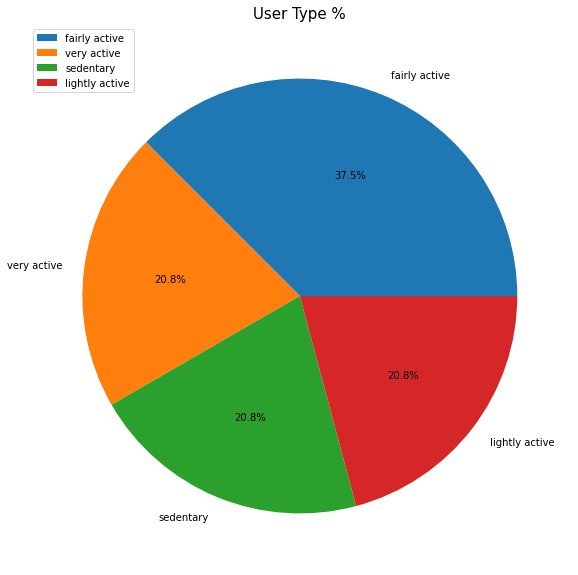

In [39]:
#USER CATEGORY- Pie Chart of the users categorized by their activity level which is measured by their avg daily steps

#formating fig size and label

plt.figure(figsize=(10,10))
plt.rc('axes', titlesize=15)


#Pie Chart

plt.pie(user_type_percentage['perc_total'], labels= user_type_percentage['user_type'], autopct='%1.1f%%')

plt.title('User Type %')

plt.legend()

plt.show()

In [40]:
#CORRELATION between steps & calories

daily_activity[['totalsteps','calories']].corr()

,totalsteps,calories
totalsteps,1.000000,0.591568
calories,0.591568,1.000000


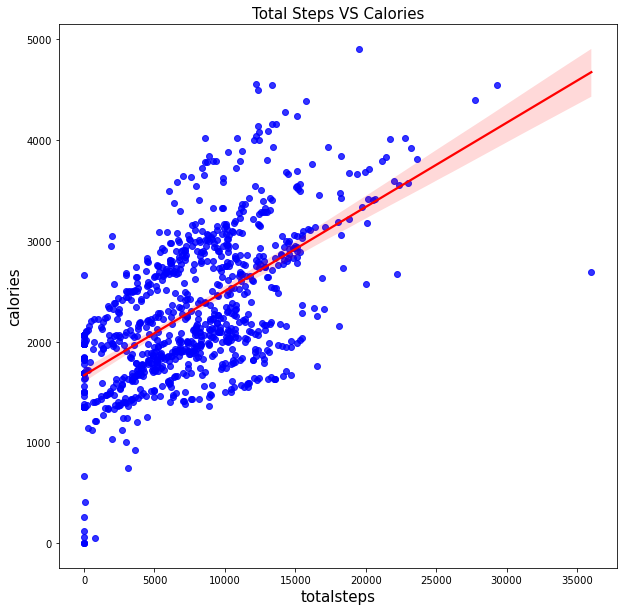

In [41]:
#CORRELATION between steps & calories

plt.figure(figsize=(10,10))


#Scatter Plot with Seaborn

sns.regplot(x= 'totalsteps', y= 'calories', data = daily_activity, scatter_kws= {"color": "blue"}, line_kws= {"color": "red"})

plt.title('Total Steps VS Calories')

plt.show()

In [42]:
#CORRELATION between steps & sleep

df_activity_sleep[['totalsteps','totalminutesasleep']].corr()

,totalsteps,totalminutesasleep
totalsteps,1.000000,-0.190344
totalminutesasleep,-0.190344,1.000000


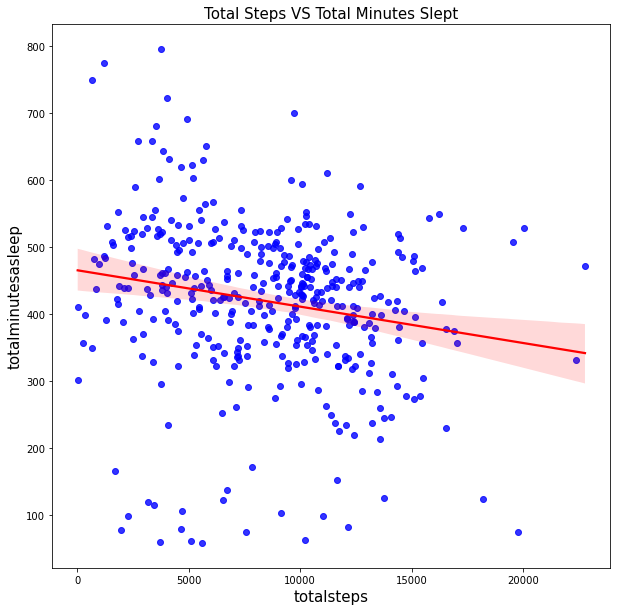

In [43]:
#CORRELATION between steps & sleep

plt.figure(figsize=(10,10))

#Scatter Plot with seaborn

sns.regplot(x= 'totalsteps', y= 'totalminutesasleep', data = df_activity_sleep, scatter_kws= {"color": "blue"}, line_kws= {"color": "red"})

plt.title('Total Steps VS Total Minutes Slept')
plt.show()

In [44]:
#group by id for 'daily_activity' df

groupby_id_daily_activity = daily_activity.groupby(by= 'id')

In [45]:
#how many days device worn by specified user

groupby_id_daily_activity['activitydate'].get_group(7007744171).dt.day.value_counts().sum()

26

In [46]:
#how many month device worn by specified user

groupby_id_daily_activity['activitydate'].get_group(7007744171).dt.month.nunique()

2

In [47]:
#We will get number of days device was worn but with 1 less day

days_worn = groupby_id_daily_activity['activitydate'].max() - groupby_id_daily_activity['activitydate'].min()

In [48]:
#df and check

days_worn = pd.DataFrame(days_worn)

days_worn

,activitydate
id,
1503960366,30 days
1624580081,30 days
1644430081,29 days
1844505072,30 days
1927972279,30 days
2022484408,30 days
2026352035,30 days
2320127002,30 days
2347167796,17 days


In [49]:
#resetting index

days_worn.reset_index(inplace=True)

In [50]:
#first converting 'activitydate' col value into str so we can use split to separate 'days' term

days_worn['activitydate'] = days_worn['activitydate'].astype('str')

In [51]:
#check

days_worn.dtypes

id               int64
activitydate    object
dtype: object

In [52]:
#spilting away 'days' term from the column

x= days_worn['activitydate'].str.split(' ', expand= True)

In [53]:
#check the column

x

,0,1
0,30,days
1,30,days
2,29,days
3,30,days
4,30,days
5,30,days
6,30,days
7,30,days
8,17,days
9,30,days


In [54]:
#adding the separated column to our 'days_worn' df

days_worn['activitydate']= x[0]

In [55]:
#Check

days_worn.dtypes

id               int64
activitydate    object
dtype: object

In [56]:
days_worn['activitydate'] = days_worn['activitydate'].astype('int')

In [57]:
#Add the 1 day to fix the final 'days_worn' df

days_worn['activitydate'] = days_worn['activitydate']+1

In [58]:
#renaming column appropriately

days_worn.rename(columns={'activitydate': 'days'}, inplace= True)

In [59]:
#Check

days_worn

,id,days
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31
5,2022484408,31
6,2026352035,31
7,2320127002,31
8,2347167796,18
9,2873212765,31


In [60]:
#adding a conditional column 'use' based on days device was used/worn per user

conditions = [
    (days_worn['days'] >= 21),
    (days_worn['days'] >= 11) & (days_worn['days'] <= 20),
    (days_worn['days'] <= 10)
]

values = ['high use', 'moderate use', 'low use']

days_worn['use'] = np.select(conditions, values)

days_worn

,id,days,use
0,1503960366,31,high use
1,1624580081,31,high use
2,1644430081,30,high use
3,1844505072,31,high use
4,1927972279,31,high use
5,2022484408,31,high use
6,2026352035,31,high use
7,2320127002,31,high use
8,2347167796,18,moderate use
9,2873212765,31,high use


In [61]:
days_worn_perc = days_worn['use'].value_counts(normalize=True)*100

In [62]:
days_worn_perc = pd.DataFrame(days_worn_perc)

days_worn_perc= round(days_worn_perc, 2)

days_worn_perc

,use
high use,87.88
moderate use,9.09
low use,3.03


In [63]:
days_worn_perc.reset_index(inplace=True)

days_worn_perc.rename(columns={'index':'use_level',
                                    'user_type': 'perc_total'}, inplace= True)

days_worn_perc

,use_level,use
0,high use,87.88
1,moderate use,9.09
2,low use,3.03


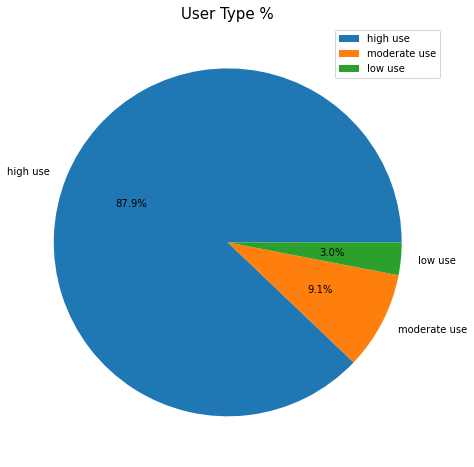

In [64]:
#USER CATEGORY- Pie Chart of the users categorized by their activity level which is measured by their avg daily steps

#formating fig size and label

plt.figure(figsize=(8,8))
plt.rc('axes', titlesize=15)

#Pie Chart

plt.pie(days_worn_perc['use'], labels= days_worn_perc['use_level'], autopct='%1.1f%%')

plt.title('User Type %')

plt.legend()

plt.show()

In [65]:
#group by 'id' on 'daily_sleep' df so that we can find mean sleep each user is getting

groupby_id_daily_sleep = daily_sleep.groupby(by='id')

groupby_id_daily_sleep.mean()

,totalsleeprecords,totalminutesasleep,totaltimeinbed
id,,,
1503960366,1.080000,360.280000,383.200000
1644430081,1.000000,294.000000,346.000000
1844505072,1.000000,652.000000,961.000000
1927972279,1.600000,417.000000,437.800000
2026352035,1.000000,506.178571,537.642857
2320127002,1.000000,61.000000,69.000000
2347167796,1.000000,446.800000,491.333333
3977333714,1.142857,293.642857,461.142857
4020332650,1.000000,349.375000,379.750000


In [66]:
#putting it in a df and resetting the index

avg_sleep= groupby_id_daily_sleep.mean()

avg_sleep.reset_index(inplace= True)

avg_sleep

,id,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,1.080000,360.280000,383.200000
1,1644430081,1.000000,294.000000,346.000000
2,1844505072,1.000000,652.000000,961.000000
3,1927972279,1.600000,417.000000,437.800000
4,2026352035,1.000000,506.178571,537.642857
5,2320127002,1.000000,61.000000,69.000000
6,2347167796,1.000000,446.800000,491.333333
7,3977333714,1.142857,293.642857,461.142857
8,4020332650,1.000000,349.375000,379.750000
9,4319703577,1.038462,476.653846,501.961538


In [67]:
#Let's see how long user's are in bed when they are not asleep
#could indicate bad sleeping habits

avg_sleep['time_to_fall_asleep'] = avg_sleep['totaltimeinbed'] - avg_sleep['totalminutesasleep']

avg_sleep

,id,totalsleeprecords,totalminutesasleep,totaltimeinbed,time_to_fall_asleep
0,1503960366,1.080000,360.280000,383.200000,22.920000
1,1644430081,1.000000,294.000000,346.000000,52.000000
2,1844505072,1.000000,652.000000,961.000000,309.000000
3,1927972279,1.600000,417.000000,437.800000,20.800000
4,2026352035,1.000000,506.178571,537.642857,31.464286
5,2320127002,1.000000,61.000000,69.000000,8.000000
6,2347167796,1.000000,446.800000,491.333333,44.533333
7,3977333714,1.142857,293.642857,461.142857,167.500000
8,4020332650,1.000000,349.375000,379.750000,30.375000
9,4319703577,1.038462,476.653846,501.961538,25.307692


In [68]:
#change 'id' dtype to str so it can be used as a label

avg_sleep['id']= avg_data['id'].astype('str')

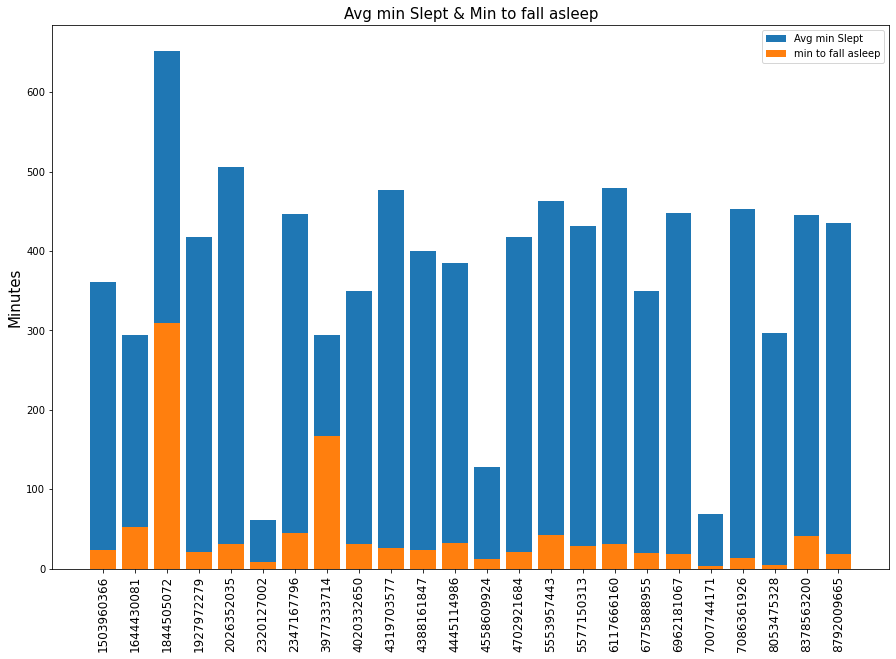

In [69]:
#formating the figuresize and font

plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.xticks(rotation='vertical')

#Barchart

plt.bar(x=avg_sleep['id'], height=avg_sleep['totalminutesasleep'], label= "Avg min Slept", )
plt.bar(x=avg_sleep['id'], height=avg_sleep['time_to_fall_asleep'], label= "min to fall asleep")

plt.title('Avg min Slept & Min to fall asleep')
plt.ylabel('Minutes')

plt.legend()
plt.show()